### Columns

   - age: age of primary beneficiary

   - sex: insurance contractor gender, female, male

   - bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

   - children: Number of children covered by health insurance / Number of dependents

   - smoker: Smoking

   - region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

   - charges: Individual medical costs billed by health insurance


In [6]:
!pip install chart_studio

  Using cached chart_studio-1.1.0-py3-none-any.whl (64 kB)


In [4]:
import numpy as np
import pandas as pd
# Plotly Packages
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.offline as pyoff 
pyoff.init_notebook_mode(connected=True)
# Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters
# Statistical Libraries
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from scipy import stats
# Regression Modeling
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
# Other Libraries
import warnings
warnings.filterwarnings("ignore")

In [5]:
from plotly.offline import iplot

## Load the data

In [7]:
df = pd.read_csv("insurance.csv")
original_df=df.copy()

In [8]:
original_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### 1. Exploratory Data Analysis

In [9]:
head = df.head(5)
head

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
describe = df.describe()
print(describe)


               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


### Distribution of Charge

In [11]:
# Determine the distribution of charge
charge_dist = df["charges"].values
logcharge = np.log(df["charges"])

trace0 = go.Histogram(
    x=charge_dist,
    histnorm='probability',
    name="Charges Distribution",
    marker = dict(color = '#FA5858'))
trace1 = go.Histogram(
    x=logcharge,
    histnorm='probability',
    name="Charges Distribution using Log",
    marker = dict(color = '#58FA82'))
fig = tools.make_subplots(rows=2, cols=1,
                          subplot_titles=('Charge Distribution','Log Charge Distribution'),
                         print_grid=True)
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig['layout'].update(showlegend=True, title='Charge Distribution', bargap=0.05)
iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

This is the format of your plot grid:
[ (1,1) x,y   ]
[ (2,1) x2,y2 ]




* Types of Distributions: right skewed distribution in which most patients are being charged between  2000− 12000.

* Using Logarithms: Logarithms helpshave a normal distribution which could help in a number of different ways such as outlier detection, implementation of statistical concepts based on the central limit theorem and for the predictive modell in the foreseen future.

* The average insurance premium is at $13,270.

In [15]:
sex = df.groupby(by = 'sex').size()
smoker = df.groupby(by = 'smoker').size()
region = df.groupby(by = 'region').size()
print(sex,smoker,region)

sex
female    662
male      676
dtype: int64 smoker
no     1064
yes     274
dtype: int64 region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64


The data is very much balanced between gender and region. On the other hand, non-smokers outnumber the smokers.


####  Charges Between Gender


sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64
1387.1723338865468


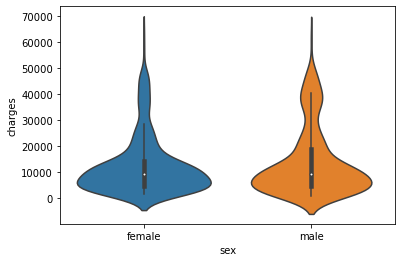

In [16]:
## check charges vs features
meanGender = df.groupby(by = "sex")["charges"].mean()
print(meanGender)
print(meanGender["male"] - meanGender["female"])
boxPlot1 = sns.violinplot(x = "sex", y = "charges", data = df)




There is not much difference between gender based on the violin plot. For males, the average charge is "slightly" higher compared to female counterparts with the difference of around $1387.


#### Charges between Smokers and non-Smokers

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64
23615.96353367665


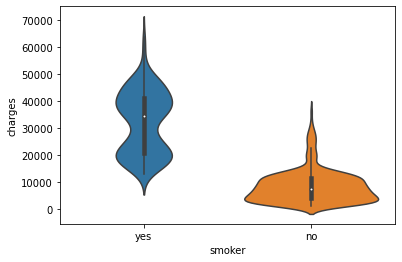

In [17]:
meanSmoker = df.groupby(by = "smoker")["charges"].mean()
print(meanSmoker)
print(meanSmoker["yes"] - meanSmoker["no"])
boxPlot2 = sns.violinplot(x = "smoker", y = "charges", data = df)




Ok, so there's around $23,615 difference between smokers and non-smokers. Smoking is very expensive indeed.


#### Charges Among Regions

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


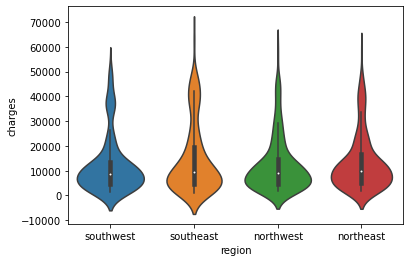

In [18]:
meanRegion = df.groupby(by = "region")["charges"].mean()
print(meanRegion)
boxPlot3 = sns.violinplot(x = "region", y = "charges", data = df)


As with the gender, region groups also does not show much difference between them based on the plot. Even so, the individuals from the Southeast has charged more on there bills. The highest charged individual also lives in the region as shown in the chart.

### Age Analysis
Turning Age into Categorical Variables:

Young Adult: from 18 - 35

Senior Adult: from 36 - 55

Elder: 56 or older

Share of each Category: Young Adults (42.9%), Senior Adults (41%) and Elder (16.1%)

In [19]:
df['age_cat'] = np.nan
lst = [df]
for col in lst:
    col.loc[(col['age'] >= 18) & (col['age'] <= 35), 'age_cat'] = 'Young Adult'
    col.loc[(col['age'] > 35) & (col['age'] <= 55), 'age_cat'] = 'Senior Adult'
    col.loc[col['age'] > 55, 'age_cat'] = 'Elder'
labels = df["age_cat"].unique().tolist()
amount = df["age_cat"].value_counts().tolist()
colors = ["#ff9999", "#b3d9ff", " #e6ffb3"]

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=15),
               marker=dict(colors=colors,line=dict(color='#000000', width=2)))
data = [trace]
layout = go.Layout(title="Amount by Age Category")
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic_pie_chart')


In [20]:
df.bmi.describe()
bmi = [df["bmi"].values.tolist()]
group_labels = ['Body Mass Index Distribution']

colors = ['#FA5858']

fig = ff.create_distplot(bmi, group_labels, colors=colors)
# Add title
fig['layout'].update(title='Normal Distribution -Central Limit Theorem Condition')

iplot(fig, filename='Basic Distplot')
print('BMI frequency: Most of the BMI frequency is concentrated between 27 - 33.')

BMI frequency: Most of the BMI frequency is concentrated between 27 - 33.


#### In Relation to Other Features



The following shows the relationship of the medical charges to other numerical variables.



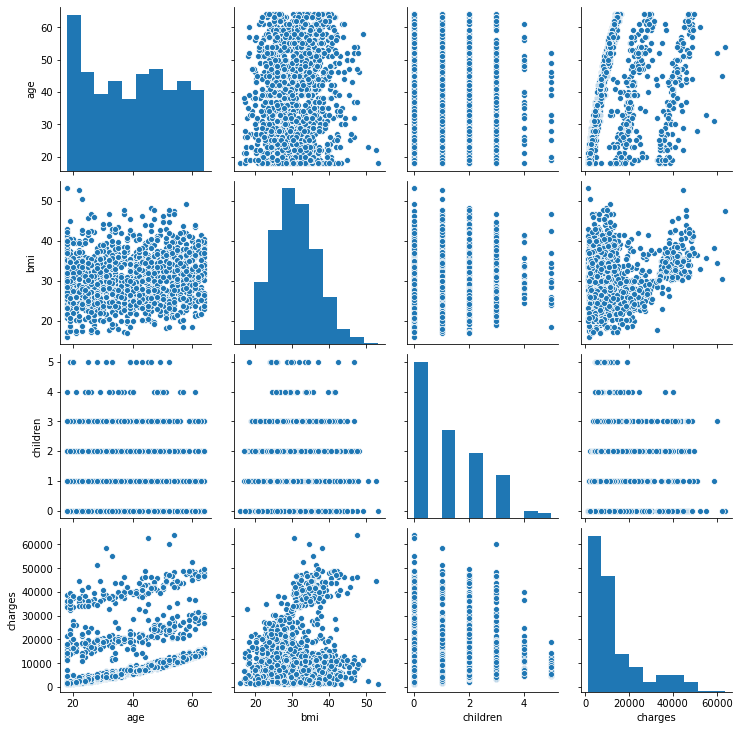

In [21]:
pairPlot = sns.pairplot(df)



Let us focus on the following relationships (first 3 charts in the bottom row):

  - charges vs age - it is apparent the that charges are higher to older individuals.
  
  - charges vs bmi - BMIs greater than 30 is considered obesed. The chart shows a group of individuals with BMI > 30 are charged higher
  - charges vs no children - those who has more children tends to have been charged lower than those who don't have.



#### 1.7 Smokers vs Non- Smokers

Based on the violin plot we have noticed a big difference in charges between the smokers and non-smokers. Let us look further on this relationship complemented with other numerical variables.

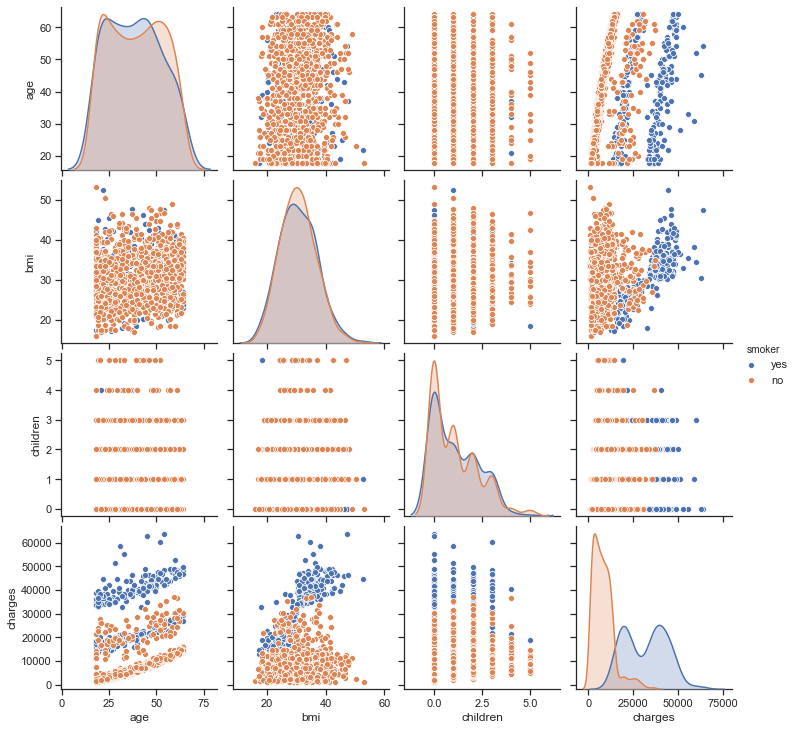

In [22]:
sns.set(style = "ticks")
smokerPairs = sns.pairplot(df, hue = "smoker")




Focusing again on the first 3 charts in the bottom row, we can say that the higher amount of charges are dominated by blue points which are represented by smokers.


In [23]:
young_adults = df["bmi"].loc[df["age_cat"] == "Young Adult"].values
senior_adult = df["bmi"].loc[df["age_cat"] == "Senior Adult"].values
elders = df["bmi"].loc[df["age_cat"] == "Elder"].values

trace0 = go.Box(
    y=young_adults,
    name = 'Young Adults',
    boxmean= True,
    marker = dict(color = 'rgb(214, 12, 140)'))
trace1 = go.Box(
    y=senior_adult,
    name = 'Senior Adults',
    boxmean= True,
    marker = dict(color = 'rgb(0, 128, 128)'))
trace2 = go.Box(
    y=elders,
    name = 'Elders',
    boxmean= True,
    marker = dict(color = 'rgb(247, 186, 166)'))

data = [trace0, trace1, trace2]
layout = go.Layout(title="Body Mass Index <br> by Age Category", xaxis=dict(title="Age Category", titlefont=dict(size=16)),
                  yaxis=dict(title="Body Mass Index", titlefont=dict(size=16)))
fig = go.Figure(data=data, layout=layout)
iplot(fig)


In [24]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges,age_cat
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult
3,33,male,22.705,0,no,northwest,21984.47061,Young Adult
4,32,male,28.880,0,no,northwest,3866.85520,Young Adult


### Comparing Independent Categorical Variables (ANOVA)
P-value: The p-value being higher than 0.05 tells us that we take the Null hypothesis, meaning that there is no a significant change between the three age categories when it comes to Body Mass Index.

In [25]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


result = ols("bmi ~ age_cat", data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     5.949
Date:                Fri, 10 Jul 2020   Prob (F-statistic):            0.00268
Time:                        13:48:12   Log-Likelihood:                -4311.2
No. Observations:                1338   AIC:                             8628.
Df Residuals:                    1335   BIC:                             8644.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [26]:
import plotly.graph_objs as go
# smoker
ya_smoker = df["bmi"].loc[(df["age_cat"] == "Young Adult") & (df["smoker"] == "yes")].values
sa_smoker = df["bmi"].loc[(df["age_cat"] == "Senior Adult") & (df["smoker"] == "yes")].values
e_smoker = df["bmi"].loc[(df["age_cat"] == "Elder") & (df["smoker"] == "yes")].values
# Non-Smokers
ya_nonsmoker = df["bmi"].loc[(df["age_cat"] == "Young Adult") & (df["smoker"] == "no")].values
sa_nonsmoker = df["bmi"].loc[(df["age_cat"] == "Senior Adult") & (df["smoker"] == "no")].values
e_nonsmoker = df["bmi"].loc[(df["age_cat"] == "Elder") & (df["smoker"] == "no")].values
x_data = ['Young A. Smoker', 'Young A. Non-Smoker',
          'Senior A. Smoker', 'Senior A. Non-Smoker',
          'Elder Smoker', 'Elder Non-Smoker',]
y0 = ya_smoker
y1 = ya_nonsmoker
y2 = sa_smoker
y3 = sa_nonsmoker
y4 = e_smoker
y5 = e_nonsmoker
y_data = [y0,y1,y2,y3,y4,y5]
colors = ['rgba(251, 43, 43, 0.5)', 'rgba(125, 251, 137, 0.5)', 
          'rgba(251, 43, 43, 0.5)', 'rgba(125, 251, 137, 0.5)', 
          'rgba(251, 43, 43, 0.5)', 'rgba(125, 251, 137, 0.5)']

traces = []
for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,name=xd,boxpoints='all',jitter=0.5,whiskerwidth=0.2,fillcolor=cls,
            marker=dict(size=2),line=dict(width=1)))
layout = go.Layout(
    title='Body Mass Index of Smokers Status by Age Category',
    xaxis=dict(title="Status",titlefont=dict(size=16)),
    yaxis=dict(title="Body Mass Index",
        autorange=True,showgrid=True,zeroline=True,dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,zerolinecolor='rgb(255, 255, 255)',zerolinewidth=2,
        titlefont=dict(size=16)),margin=dict(l=40,r=30,b=80,t=100),
        paper_bgcolor='rgb(255, 255, 255)',
        plot_bgcolor='rgb(255, 243, 192)',showlegend=False)

fig = go.Figure(data=traces, layout=layout)
iplot(fig)

### Who got charged more on Average by Age?¶

In [27]:
# Mean could be affected easily by outliers or extreme cases.
# Means
avg_ya_charge = df["charges"].loc[df["age_cat"] == "Young Adult"].mean()
avg_sa_charge = df["charges"].loc[df["age_cat"] == "Senior Adult"].mean()
avg_e_charge = df["charges"].loc[df["age_cat"] == "Elder"].mean()
# Median
med_ya_charge = df["charges"].loc[df["age_cat"] == "Young Adult"].median()
med_sa_charge = df["charges"].loc[df["age_cat"] == "Senior Adult"].median()
med_e_charge = df["charges"].loc[df["age_cat"] == "Elder"].median()

average_plot = go.Bar(
    x=['Young Adults', 'Senior Adults', 'Elder'],
    y=[avg_ya_charge, avg_sa_charge, avg_e_charge],
    name='Mean',
    marker=dict(color="#F5B041"))
med_plot = go.Bar(
    x=['Young Adults', 'Senior Adults', 'Elder'],
    y=[med_ya_charge, med_sa_charge, med_e_charge],
    name='Median',
    marker=dict(color="#48C9B0"))
fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]],
                          subplot_titles=('Average Charge by Age','Median Charge by Age'),
                         shared_yaxes=True, print_grid=False)
fig.append_trace(average_plot, 1, 1)
fig.append_trace(med_plot, 1, 2)
fig['layout'].update(showlegend=True, title='Age Charges', xaxis=dict(title="Age Category"), yaxis=dict(title="Patient Charges"), bargap=0.15)
iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

### WEIGHT STATUS
Turning BMI into Categorical Variables:
Under Weight: Body Mass Index (BMI)  <  18.5
Normal Weight: Body Mass Index (BMI)  ≥  18.5 and Body Mass Index (BMI)  <  24.9
Overweight: Body Mass Index (BMI)  ≥  25 and Body Mass Index (BMI)  <  29.9
Obese: Body Mass Index (BMI)  >  30

In [28]:
df["weight_condition"] = np.nan
lst = [df]
for col in lst:
    col.loc[col["bmi"] < 18.5, "weight_condition"] = "Underweight"
    col.loc[(col["bmi"] >= 18.5) & (col["bmi"] < 24.986), "weight_condition"] = "Normal Weight"
    col.loc[(col["bmi"] >= 25) & (col["bmi"] < 29.926), "weight_condition"] = "Overweight"
    col.loc[col["bmi"] >= 30, "weight_condition"] = "Obese"
    
df.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,weight_condition
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Young Adult,Normal Weight
4,32,male,28.880,0,no,northwest,3866.85520,Young Adult,Overweight


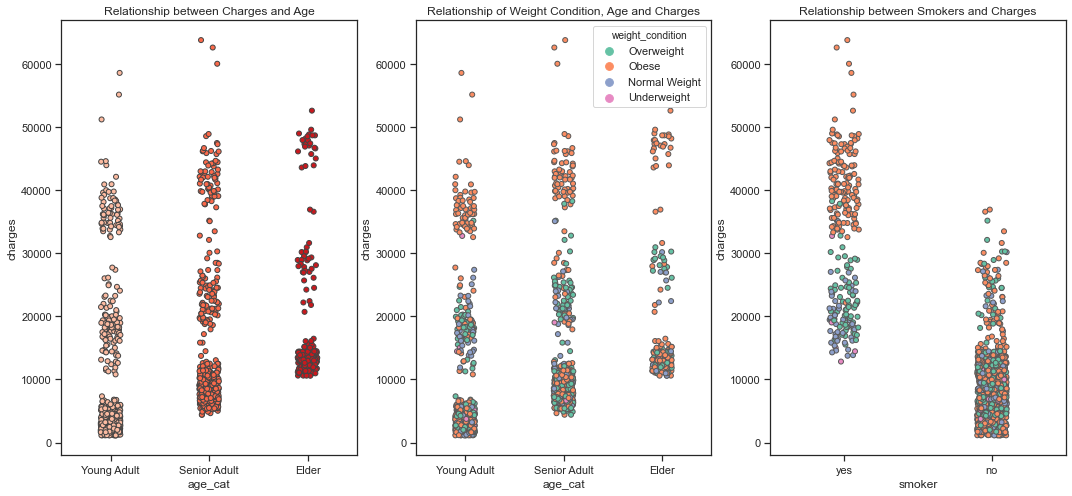

In [29]:
# Create subpplots
f, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18,8))

# I wonder if the cluster that is on the top is from obese people
sns.stripplot(x="age_cat", y="charges", data=df, ax=ax1, linewidth=1, palette="Reds")
ax1.set_title("Relationship between Charges and Age")


sns.stripplot(x="age_cat", y="charges", hue="weight_condition", data=df, ax=ax2, linewidth=1, palette="Set2")
ax2.set_title("Relationship of Weight Condition, Age and Charges")

sns.stripplot(x="smoker", y="charges", hue="weight_condition", data=df, ax=ax3, linewidth=1, palette="Set2")
ax3.legend_.remove()
ax3.set_title("Relationship between Smokers and Charges")

plt.show()


In [30]:
df[df.isnull().any(axis=1)]
# no null values

,age,sex,bmi,children,smoker,region,charges,age_cat,weight_condition


## WEIGHT STATUS VS CHARGES

In [31]:
fig = ff.create_facet_grid(
    df,
    x='age',
    y='charges',
    color_name='weight_condition',
    show_boxes=False,
    marker={'size': 10, 'opacity': 1.0},
    colormap={'Underweight': 'rgb(208, 246, 130)', 'Normal Weight': 'rgb(166, 246, 130)',
             'Overweight': 'rgb(251, 232, 238)', 'Obese': 'rgb(253, 45, 28)'}
)
251, 232, 238


fig['layout'].update(title="Weight Status vs Charges", width=800, height=600, plot_bgcolor='rgb(251, 251, 251)', 
                     paper_bgcolor='rgb(255, 255, 255)')


iplot(fig, filename='facet - custom colormap')


Text(0.5, 1.0, 'Smokers')

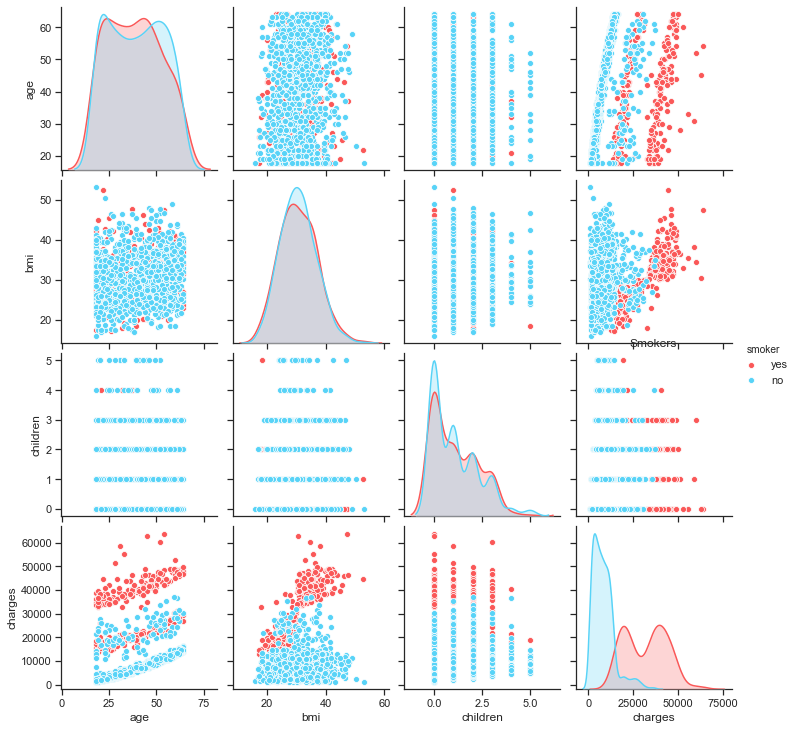

In [32]:
sns.set(style="ticks")
pal = ["#FA5858", "#58D3F7"]

sns.pairplot(df, hue="smoker", palette=pal)
plt.title("Smokers")

In [33]:
pointspossmoker = [-0.9,-1.1,-0.6,-0.3]
pointposnonsmoker = [0.45,0.55,1,0.4]
showLegend = [True,False,False,False]

data = []
for i in range(0,len(pd.unique(df['weight_condition']))):
    male = {
            "type": 'violin',
            "x": df['weight_condition'][ (df['smoker'] == 'yes') & (df['weight_condition'] == pd.unique(df['weight_condition'])[i]) ],
            "y": df['charges'][ (df['smoker'] == 'yes') & (df['weight_condition'] == pd.unique(df['weight_condition'])[i]) ],
            "legendgroup": 'Smoker',
            "scalegroup": 'Smoker',
            "name": 'Smoker',
            "side": 'negative',
            "box": {"visible": True},
            "points": 'all',
            "pointpos": pointspossmoker[i],
            "jitter": 0,
            "scalemode": 'count',
            "meanline": {
                "visible": True
            },
            "line": {
                "color": '#DF0101'
            },
            "marker": {
                "line": {
                    "width": 2,
                    "color": '#F78181'
                }
            },
            "span": [
                0
            ],
            "showlegend": showLegend[i]
        }
    data.append(male)
    female = {
            "type": 'violin',
            "x": df['weight_condition'] [ (df['smoker'] == 'no') & (df['weight_condition'] == pd.unique(df['weight_condition'])[i]) ],
            "y": df['charges'] [ (df['smoker'] == 'no') & (df['weight_condition'] == pd.unique(df['weight_condition'])[i]) ],
            "legendgroup": 'Non-Smoker',
            "scalegroup": 'Non-Smoker',
            "name": 'Non-Smoker',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "points": 'all',
            "pointpos": pointposnonsmoker[i],
            "jitter": 0,
            "scalemode": 'count',
            "meanline": {
                "visible": True
            },
            "line": {
                "color": '#00FF40'
            },
            "marker": {
                "line": {
                    "width": 2,
                    "color": '#81F781'
                }
            },
            "span": [
                0
            ],
            "showlegend": showLegend[i]
        }
    data.append(female)
        

fig = {
    "data": data,
    "layout" : {
        "title": "Charges Distribution of Obese Patients<br><i>Group by Smoking Status",
        "yaxis": {
            "zeroline": False,
            "title": "Patient Charges",
            "titlefont": {
                "size": 16
            }
        },
        "violingap": 0,
        "violingroupgap": 0,
        "violinmode": "overlay"
    }
}


iplot(fig, filename='violin/advanced', validate = False)

In [34]:
#an obvious difference IN THE OBESE GROUP

chargedist_sm = df["charges"].loc[(df["weight_condition"] == "Obese") & (df["smoker"] == "yes")].values
chargedist_nsm = df["charges"].loc[(df["weight_condition"] == "Obese") & (df["smoker"] == "no")].values

trace0 = go.Box(
    y=chargedist_sm,
    name = 'Obese Smokers',
    marker = dict(
        color = '#DF0101',
    )
)
trace1 = go.Box(
    y=chargedist_nsm,
    name = 'Obese Non-Smokers',
    marker = dict(
        color = '#00FF40',
    )
)


data = [trace0, trace1]


layout = dict(title="Deeper Look into Obese condition by Smoking status",
             xaxis=dict(
             title="Status",
             titlefont=dict(
             size=16)),
             yaxis=dict(title="Patient Charges",
                       titlefont=dict(size=16)),
              )

fig = go.Figure(data=data, layout=layout)
iplot(fig)

* Separation in Charges between Obese Smokers vs Non-Obese Smokers
* In this chart we can visualize how can separate obese smokers and obese non-smokers into different clusters of groups. Therefore, we can say that smoking is a characteristic that definitely affects patient's charges.

In [35]:
# Create a Scatter Plot with all the Obese
obese_smoker = df.loc[(df["weight_condition"] == "Obese") & (df["smoker"] == "yes")]
obese_nonsmoker = df.loc[(df["weight_condition"] == "Obese") & (df["smoker"] == "no")]


trace0 = go.Scatter(
    x = obese_smoker["age"].values,
    y = obese_smoker["charges"].values,
    name = 'Smokers',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = '#DF0101',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace1 = go.Scatter(
    x = obese_nonsmoker["age"].values,
    y = obese_nonsmoker["charges"].values,
    name = 'Non-Smokers',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = '#00FF40',
        line = dict(
            width = 2,
        )
    )
)

data = [trace0, trace1]

layout = dict(title = 'Clear Separation between Obese Smokers and Non-Smokers in Charges',
              yaxis = dict(zeroline = False,
                          title="Patient Charges",
                          titlefont=dict(size=16)),
              xaxis = dict(zeroline = False,
                          title="Age of the Patient",
                          titlefont=dict(
                          size=16))
             )

fig = dict(data=data, layout=layout)
iplot(fig, filename='styled-scatter')

## REGIONAL ANALYSIS

In [36]:
# Contingency table by weight condition and sex
df.head()

region_smoker = pd.crosstab(df['smoker'], df['region']).apply(lambda x: x/x.sum() * 100)
region_smoker

region,northeast,northwest,southeast,southwest
smoker,,,,
no,79.320988,82.153846,75.0,82.153846
yes,20.679012,17.846154,25.0,17.846154


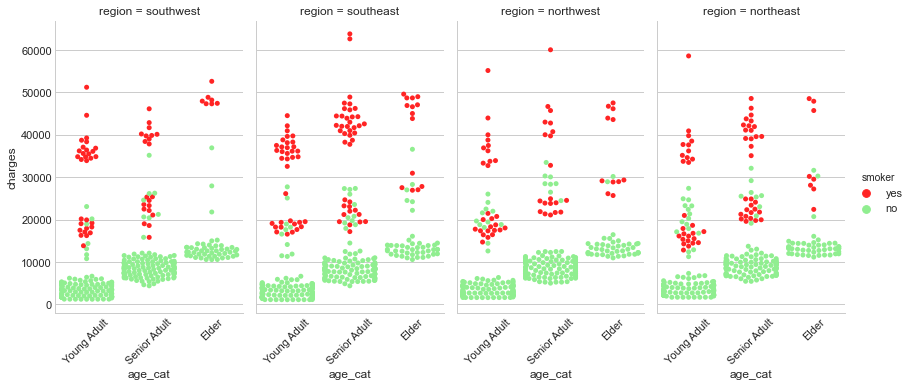

In [37]:
plt.style.use('seaborn-whitegrid')

ticks = df['age_cat'].unique()
colors = ['#ff2424', '#90ee90']


ax = sns.catplot(x="age_cat", y="charges", hue="smoker",
                 col="region", aspect=.6,
                 kind="swarm", palette=colors, data=df);

ax.set_xticklabels(labels = ticks, rotation=45)

plt.show()

In [38]:
# Obesity per region
region_weight = pd.crosstab(df['weight_condition'], df['region']).apply(lambda x: x/x.sum() * 100)
region_weight = round(region_weight, 2)
region_weight

region,northeast,northwest,southeast,southwest
weight_condition,,,,
Normal Weight,22.53,19.38,11.26,14.77
Obese,44.14,45.54,66.76,53.23
Overweight,30.25,32.92,21.98,31.08
Underweight,3.09,2.15,0.00,0.92


## AVAERAGE PATIENT CHARGE BY REGION
* Median Patient Charges: The NorthEast is the region that pays the most on average while the SouthWest is the one that pays
* Obese group: From the obese group, the Southwest is the region where obese patients pay the most..
* Overweight: From the obese group, the NorthWest is the region where obese patients pay the most.
* Normal Weight: From the obese group, the SouthEast is the region where obese patients pay the most.
* Underweight: From the obese group, the NorthWest is the region where obese patients pay the most.

In [39]:
df.head()


# Average charge by Region
df["region"].unique()

# Median Charges per Region
southwest = np.median(df["charges"].loc[df["region"] == "southwest"].values)
southeast = np.median(df["charges"].loc[df["region"] == "southeast"].values)
northwest = np.median(df["charges"].loc[df["region"] == "northwest"].values)
northeast = np.median(df["charges"].loc[df["region"] == "northeast"].values)

lst = [southwest, southeast, northwest, northeast]

data = [go.Scatterpolar(
  r = [southwest, southeast, northwest, northeast],
  theta = ['SouthWest', 'SouthEast', 'NorthWest', 'NorthEast'],
  fill = 'toself'
)]

layout = go.Layout(
    title="Median Charged to Patients by Region",
    paper_bgcolor = "rgb(255, 255, 224)",
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [0, max(lst)]
    )
  ),
  showlegend = False
)


fig = go.Figure(data=data, layout=layout)
iplot(fig, filename = "radar/basic")

In [40]:
# Weight Condition by Region Radar plots

df["weight_condition"].unique()

# Average charges for overweight patients by region 
sw_overweight = np.mean(df["charges"].loc[(df["region"] == "southwest") & (df["weight_condition"] == "Overweight")].values)
se_overweight = np.mean(df["charges"].loc[(df["region"] == "southeast") & (df["weight_condition"] == "Overweight")].values)
nw_overweight = np.mean(df["charges"].loc[(df["region"] == "northwest") & (df["weight_condition"] == "Overweight")].values)
ne_overweight = np.mean(df["charges"].loc[(df["region"] == "northeast") & (df["weight_condition"] == "Overweight")].values)

# Obese
sw_obese = np.mean(df["charges"].loc[(df["region"] == "southwest") & (df["weight_condition"] == "Obese")].values)
se_obese = np.mean(df["charges"].loc[(df["region"] == "southeast") & (df["weight_condition"] == "Obese")].values)
nw_obese = np.mean(df["charges"].loc[(df["region"] == "northwest") & (df["weight_condition"] == "Obese")].values)
ne_obese = np.mean(df["charges"].loc[(df["region"] == "northeast") & (df["weight_condition"] == "Obese")].values)

# Normal Weight
sw_nw = np.mean(df["charges"].loc[(df["region"] == "southwest") & (df["weight_condition"] == "Normal Weight")].values)
se_nw = np.mean(df["charges"].loc[(df["region"] == "southeast") & (df["weight_condition"] == "Normal Weight")].values)
nw_nw = np.mean(df["charges"].loc[(df["region"] == "northwest") & (df["weight_condition"] == "Normal Weight")].values)
ne_nw = np.mean(df["charges"].loc[(df["region"] == "northeast") & (df["weight_condition"] == "Normal Weight")].values)

# Underweight
sw_uw = np.mean(df["charges"].loc[(df["region"] == "southwest") & (df["weight_condition"] == "Underweight")].values)
se_uw = np.mean(df["charges"].loc[(df["region"] == "southeast") & (df["weight_condition"] == "Underweight")].values)
nw_uw = np.mean(df["charges"].loc[(df["region"] == "northwest") & (df["weight_condition"] == "Underweight")].values)
ne_uw = np.mean(df["charges"].loc[(df["region"] == "northeast") & (df["weight_condition"] == "Underweight")].values)

# Labels
weight_labels = df["weight_condition"].unique().tolist()

# List per weight condition
sw_weights = [sw_overweight, sw_obese, sw_nw, sw_uw]
se_weights = [se_overweight, se_overweight, se_nw, se_uw]
nw_weights = [nw_overweight, nw_overweight, nw_nw, nw_uw]
ne_weights = [ne_overweight, ne_overweight, ne_nw, ne_uw]

data = [
    go.Scatterpolar(
        mode="lines+markers",
        r = sw_weights,
        theta = weight_labels,
        fill = 'toself',
        name="SouthWest",
        line=dict(
            color="rgba(0, 128, 128, 0.95)"
        ),
        marker=dict(
            color="rgba(0, 74, 147, 1)",
            symbol="square",
            size=8
        ),
        subplot = "polar"
    ),
    go.Scatterpolar(
        mode="lines+markers",
        r = se_weights,
        theta = weight_labels,
        fill = 'toself',
        name="SouthEast",
        line=dict(
            color="rgba(255, 72, 72, 0.95)"
        ),
        marker=dict(
            color="rgba(219, 0, 0, 1)",
            symbol="square",
            size=8
        ),
        subplot = "polar2"
    ),
    go.Scatterpolar(
        mode="lines+markers",
        r = nw_weights,
        theta = weight_labels,
        fill = 'toself',
        name="NorthWest",
        line=dict(
            color="rgba(72, 255, 72, 0.95)"
        ),
        marker=dict(
            color="rgba(0, 147, 74, 1)",
            symbol="square",
            size=8
        ),
        subplot = "polar3"
    ),
       go.Scatterpolar(
        mode="lines+markers",
        r = ne_weights,
        theta = weight_labels,
        fill = 'toself',
        name="NorthEast",
        line=dict(
            color="rgba(247, 133, 11, 0.95)"
        ),
        marker=dict(
            color="rgba(245, 168, 86, 1)",
            symbol="square",
            size=8
        ),
        subplot = "polar4"
    )
]

layout = go.Layout(
    title="Average Patient Charges <br> by Region <br>(Depending on the Patient's Weight Condition)",
    showlegend = False,
     paper_bgcolor = "rgb(252, 234, 161)",
    polar = dict(
      domain = dict(
        x = [0, 0.46],
        y = [0.56, 1]
      ),
      radialaxis = dict(
        tickfont = dict(
          size = 6
        )
      ),
      angularaxis = dict(
        tickfont = dict(
          size = 8
        ),
        rotation = 40,
        direction = "clockwise"
      )
    ),
    polar2 = dict(
      domain = dict(
        x = [0, 0.46],
        y = [0, 0.44]
      ),
      radialaxis = dict(
        tickfont = dict(
          size = 6
        )
      ),
      angularaxis = dict(
        tickfont = dict(
          size = 8
        ),
        rotation = 40,
        direction = "clockwise"
      ),
    ),
    polar3 = dict(
      domain = dict(
       x = [0.54, 1],
        y = [0.56, 1]
      ),
      radialaxis = dict(
        tickfont = dict(
          size = 6
        )
      ),
      angularaxis = dict(
        tickfont = dict(
          size = 8
        ),
        rotation = 40,
        direction = "clockwise"
      ),
    ),
        polar4 = dict(
      domain = dict(
        x = [0.54, 1],
        y = [0, 0.44]
      ),
      radialaxis = dict(
        tickfont = dict(
          size = 6
        )
      ),
      angularaxis = dict(
        tickfont = dict(
          size = 8
        ),
        rotation = 40,
        direction = "clockwise"
      ),
    ))

fig = go.Figure(data=data, layout=layout)
fig['layout'].update(height=800, width=800)
iplot(fig, filename='polar/directions')


Text(17, 40000, 'The Impact of Smoking to \n Charges on other \n Weight Conditions ')

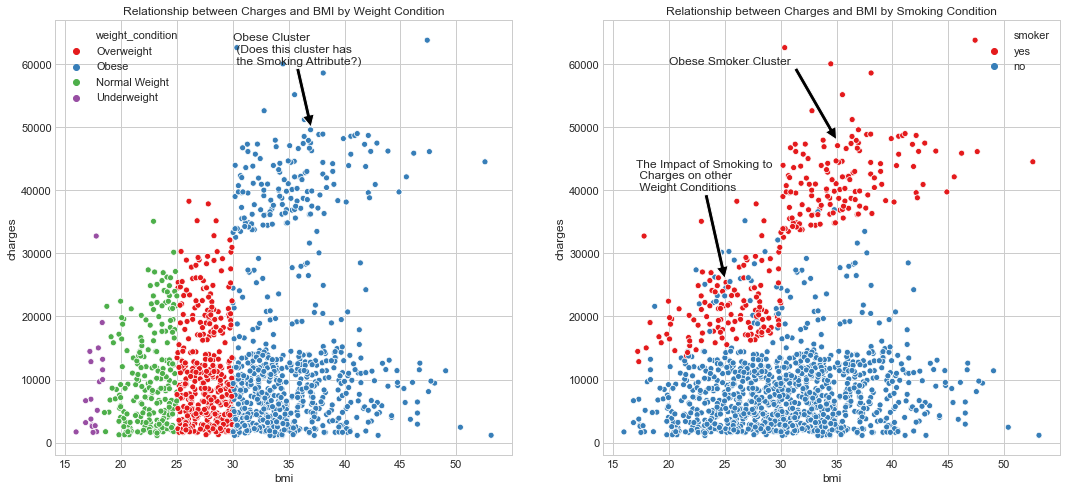

In [41]:
# Two subplots one with weight condition and the other with smoker.

f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,8))
sns.scatterplot(x="bmi", y="charges", hue="weight_condition", data=df, palette="Set1", ax=ax1)
ax1.set_title("Relationship between Charges and BMI by Weight Condition")
ax1.annotate('Obese Cluster \n (Does this cluster has \n the Smoking Attribute?)', xy=(37, 50000), xytext=(30, 60000),
            arrowprops=dict(facecolor='black'),
            fontsize=12)
sns.scatterplot(x="bmi", y="charges", hue="smoker", data=df, palette="Set1", ax=ax2)
ax2.set_title("Relationship between Charges and BMI by Smoking Condition")
ax2.annotate('Obese Smoker Cluster ', xy=(35, 48000), xytext=(20, 60000),
            arrowprops=dict(facecolor='black'),
            fontsize=12)
ax2.annotate('The Impact of Smoking to \n Charges on other \n Weight Conditions ', xy=(25, 26000), xytext=(17, 40000),
            arrowprops=dict(facecolor='black'),
            fontsize=12)

We have already visualized the relationship of the variables to the charges. Now we will further investigate by looking at the relationships using multiple linear regression. Remember that the aim of this section is to quantify the relationship and not to create the prediction model. Let us first create a training and testing data set to proceed.

Based on the visualization, we can make a couple of hypothesis about the relationship.


   - There is no real difference in charges between gender or regions.
    
   - The charge for smokers are very much higher than the non-smokers.
    
   - The charge gets higher as the individual gets older.
    
   - The charge gers higher as the individual reaches over 30BMI.
    
   - Lastly, the charge is higher for those who have fewer number of children.


In [68]:
! pip install yellowbrick

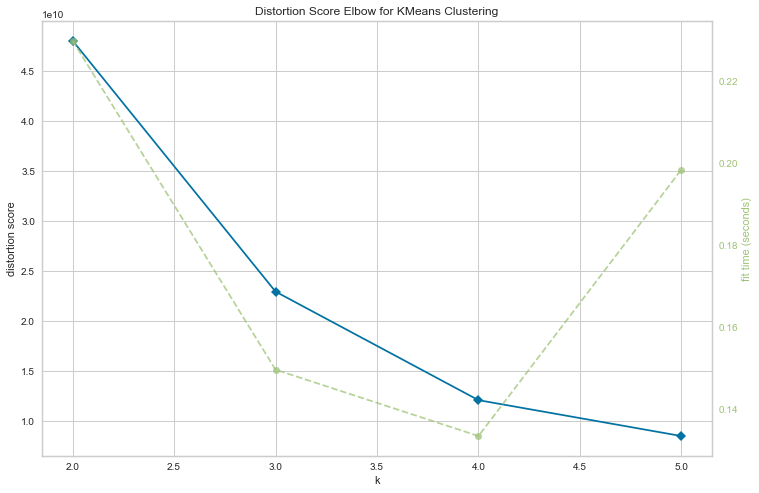

In [42]:
# ELBOW METHOD FOR KMEANS
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

fig = plt.figure(figsize=(12,8))

# KNears Neighbors 
df.head()
original_df.head()

X = df[["bmi", "charges"]]


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,6))

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()  

In [43]:
import pandas as pd

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3)  
kmeans.fit(X)

KMeans(n_clusters=3)

In [71]:
# Printing the Centroids
print(kmeans.cluster_centers_)


[[2.91114984e+01 1.85057118e+04]
 [3.04320311e+01 6.29601781e+03]
 [3.48454321e+01 4.07613086e+04]]


In [72]:
print(kmeans.labels_)

[0 1 1 ... 1 1 0]


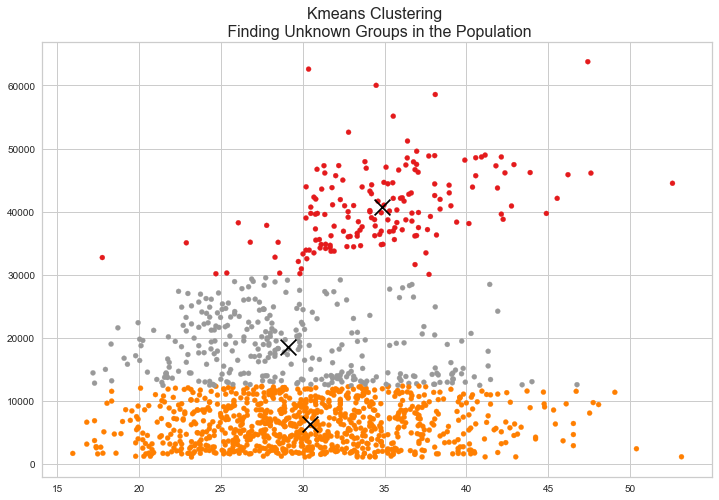

In [73]:
fig = plt.figure(figsize=(12,8))

plt.scatter(X.values[:,0], X.values[:,1], c=kmeans.labels_, cmap="Set1_r", s=25)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.title("Kmeans Clustering \n Finding Unknown Groups in the Population", fontsize=16)
plt.show()

In [74]:
# STRESS LEVEL = BMI + Children / Age
df["stress_level"] = df["children"] * df["age"] / df["bmi"]

df.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,weight_condition,stress_level
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,Overweight,0.000000
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,Obese,0.533017
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,Obese,2.545455
3,33,male,22.705,0,no,northwest,21984.47061,Young Adult,Normal Weight,0.000000
4,32,male,28.880,0,no,northwest,3866.85520,Young Adult,Overweight,0.000000


### CORRELATIONS AND BIVARIATE ANALYSIS

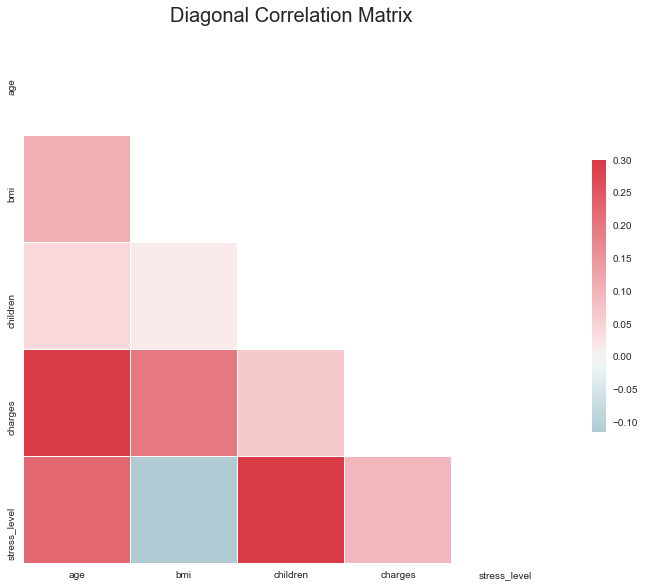

In [75]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Diagonal Correlation Matrix", fontsize=20)

plt.show()

### PREPROCESSING AND PIPELINES

In [46]:
# First we should split our original data.

from sklearn.model_selection import train_test_split

# Shuffle our dataset before splitting

original_df = original_df.sample(frac=1, random_state=1)

X = original_df.drop("charges", axis=1)
y = original_df["charges"]

# Split into both training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

### Dealing with Collinearity
What we will do:
* Remove the stress level feature These two features are highly correlated
* Adding features manually: We will add features manually into our linear model and see how well it performs, also this will allow us to avoid collinearity

* Key: The main issue was the creation of the stress level variable which by removing that feature we can guarantee that collinearity is removed from our model.

In [80]:
# Drop the columns we created.

df = df.drop(['weight_condition', 'age_cat'], axis=1)

In [81]:
df.drop(['stress_level'], axis=1, inplace=True)

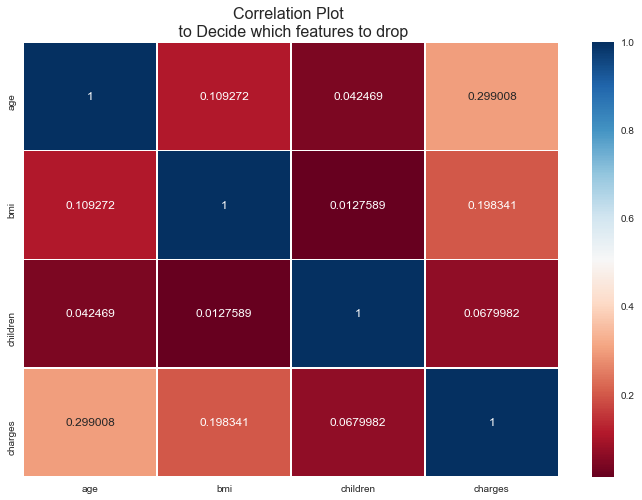

In [82]:
fig = plt.figure(figsize=(12,8))

corr = df.corr()
ax = sns.heatmap(corr, linewidths=.5, cmap="RdBu", annot=True, fmt="g")
plt.title("Correlation Plot \n to Decide which features to drop", fontsize=16)
plt.show()

In [47]:
# Let's create the training set by combining the previous X_train and y_train.
train = X_train.join(y_train, lsuffix='_X_train', rsuffix='_y_train')
test = X_test.join(y_test, lsuffix='_X_test', rsuffix='_y_test')

# Random seed
np.random.seed(42)

# Shuffle Randomly the training set
train = train.sample(frac=1)
train.head()

,age,sex,bmi,children,smoker,region,charges
109,63,male,35.09,0,yes,southeast,47055.5321
875,23,female,28.12,0,no,northwest,2690.1138
348,36,female,29.92,1,no,southeast,5478.0368
1240,52,male,41.80,2,yes,southeast,47269.8540
454,32,male,46.53,2,no,southeast,4686.3887


In [48]:
model_without_smoking = ols("charges ~ bmi + age", data=train).fit()
print(model_without_smoking.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     65.90
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           1.04e-27
Time:                        14:47:02   Log-Likelihood:                -11526.
No. Observations:                1070   AIC:                         2.306e+04
Df Residuals:                    1067   BIC:                         2.307e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5447.2679   1983.649     -2.746      0.0

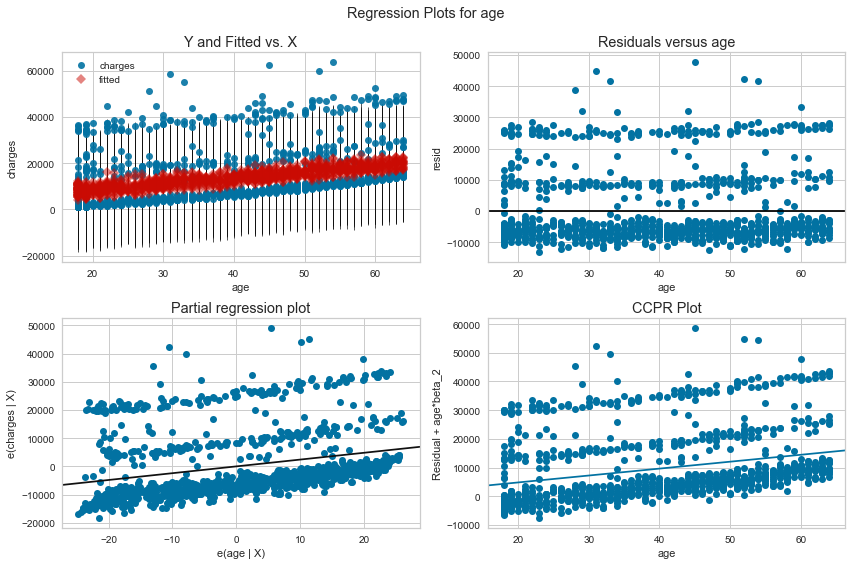

In [49]:
# Age in out X-axis since it has a higher correlation with charges.
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_without_smoking, "age", fig=fig)

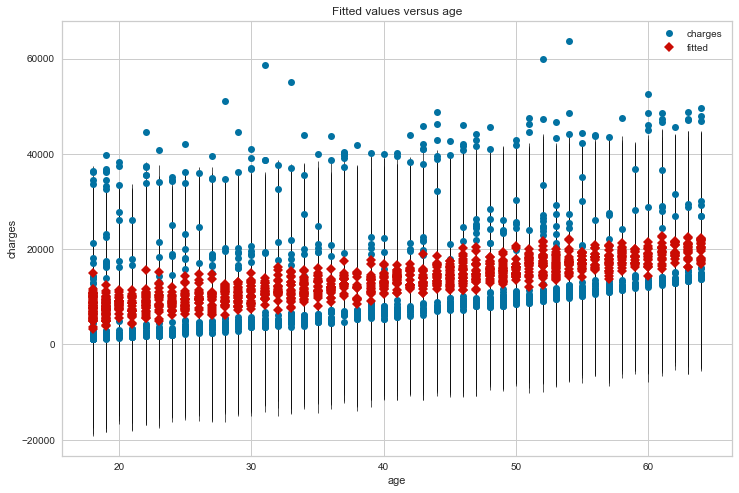

In [87]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(model_without_smoking, "age", ax=ax)

In [50]:
model_with_smoking = ols("charges ~ smoker + bmi + age", data=train).fit()
print(model_with_smoking.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     1048.
Date:                Fri, 10 Jul 2020   Prob (F-statistic):          2.43e-317
Time:                        14:47:24   Log-Likelihood:                -10853.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1066   BIC:                         2.173e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.167e+04   1065.265    -10.953

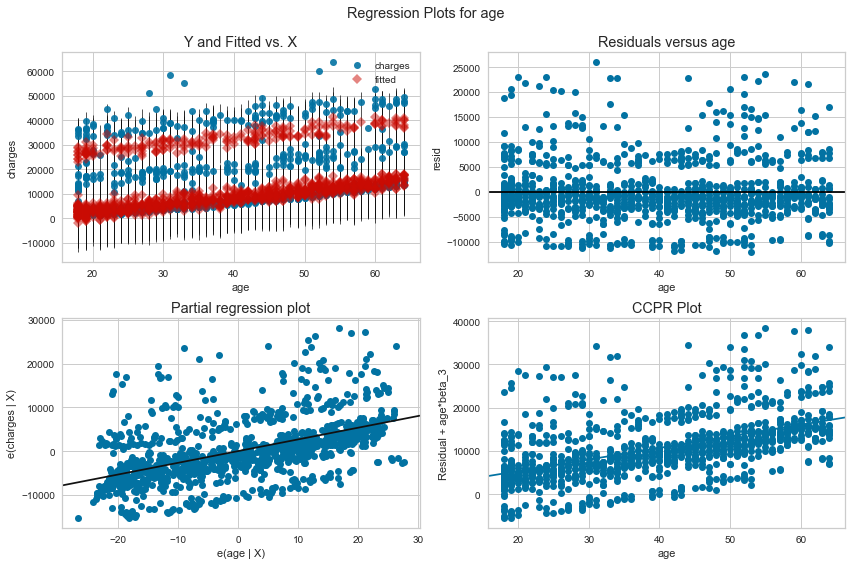

In [89]:
# Age in out X-axis since it has a higher correlation with charges.
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_with_smoking, "age", fig=fig)

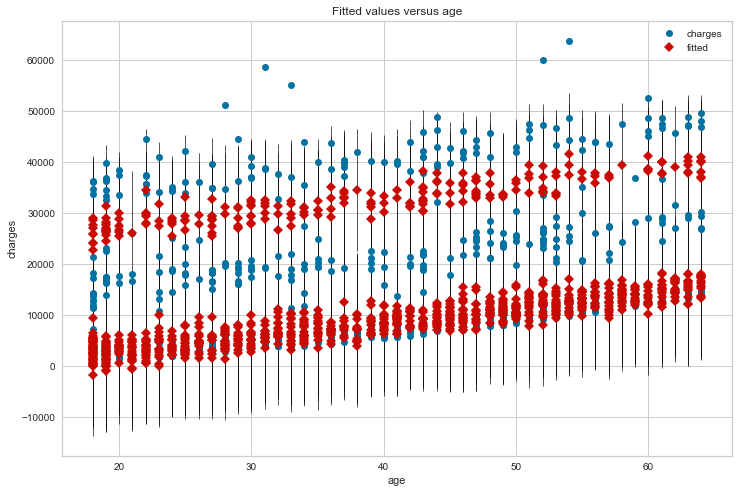

In [90]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(model_with_smoking, "age", ax=ax)

In [51]:
# Let's see the skewness of charges
not_normalized = skew(df['charges'].values.tolist())
normalized = skew(np.log(df['charges'].values.tolist()))


trace0 = go.Bar(
    x=['Not Normalized', 'Normalized'],
    y=[not_normalized, normalized],
    text=['Not Normalized Skewness', 'Normalized Skewness'],
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='Patient Charges Skewness \n Normalized vs Not Normalized',
    yaxis=dict(
        title='Skewness Coeficient',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        )
))

fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='bar-direct-labels')


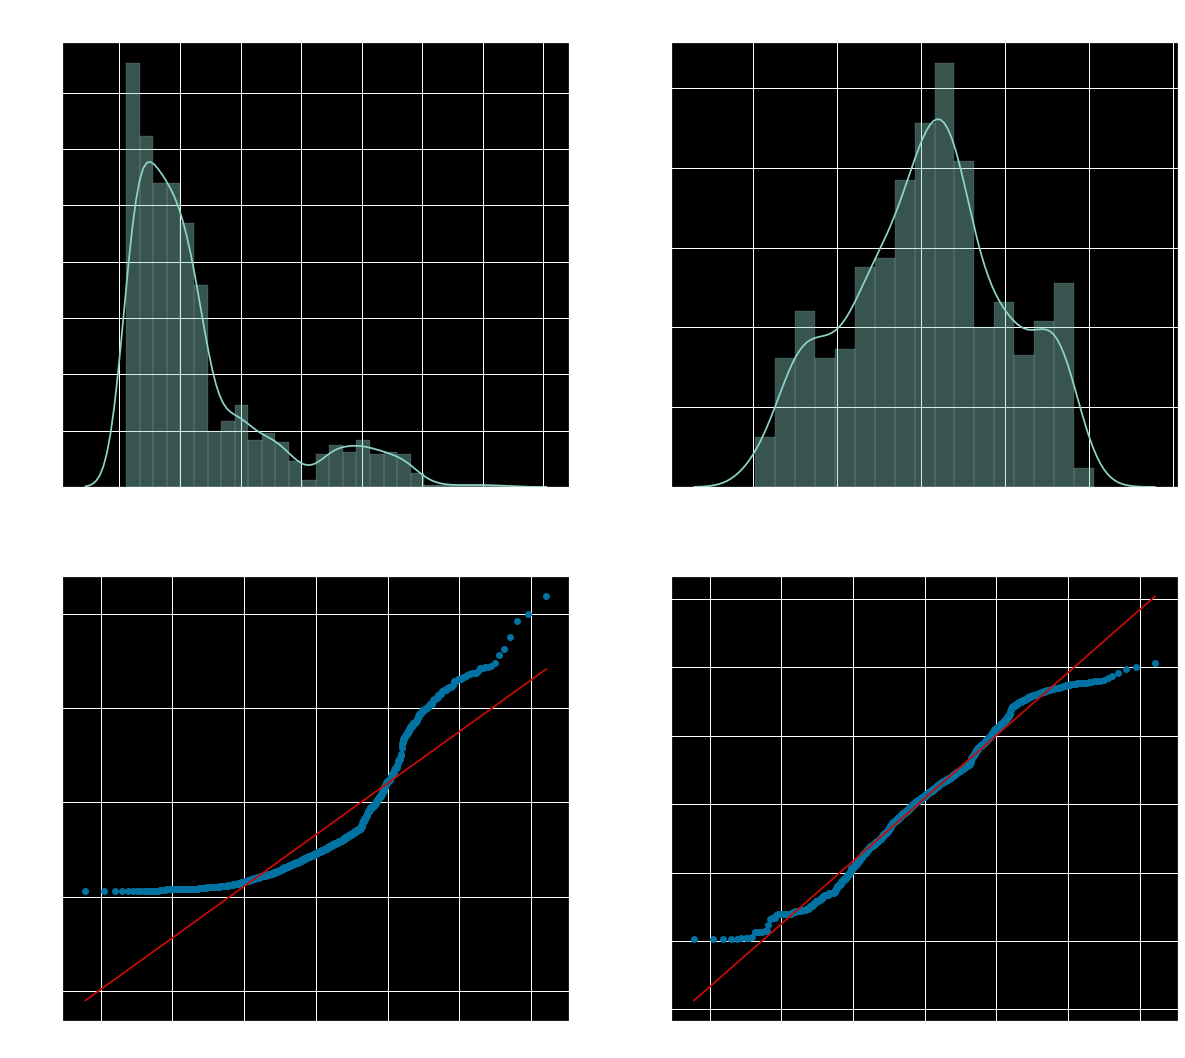

In [130]:


charges = df['charges'].values

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20,18)) 

# Distribution of charges
sns.distplot(train['charges'], ax=ax1)
ax1.set_title("Distribution of Charges \n (Right-Skewed)", fontsize=16)


# Scaling charges using a natural logarithm.
sns.distplot(np.log(train['charges']), ax=ax2)
ax2.set_title("Scaled Distribution of Charges \n (Symmetric Distribution)", fontsize=16)

# Quantile plot 
stats.probplot(train["charges"], plot=ax3)
ax3.set_title("Probability Plot \n (Unscaled)", fontsize=16)

stats.probplot(np.log(train["charges"]), plot=ax4)
ax4.set_title("Probability Plot \n (Scaled using Natural Logarithm)", fontsize=16)

plt.show()

In [93]:
train['log_charges'] = np.log(train["charges"])

model_with_logcharges = ols("log_charges ~ smoker + bmi + age", data=train).fit()
print(model_with_smoking.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1044.
Date:                Wed, 08 Jul 2020   Prob (F-statistic):          1.22e-316
Time:                        13:22:27   Log-Likelihood:                -10845.
No. Observations:                1070   AIC:                         2.170e+04
Df Residuals:                    1066   BIC:                         2.172e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.127e+04   1055.903    -10.676

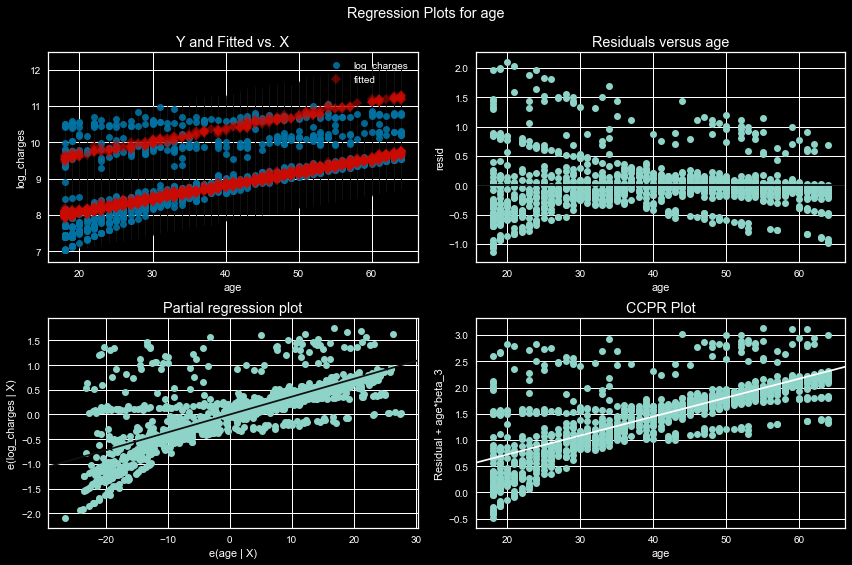

In [132]:
# Using age to predict charges
plt.style.use("dark_background")

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_with_logcharges, "age", fig=fig)


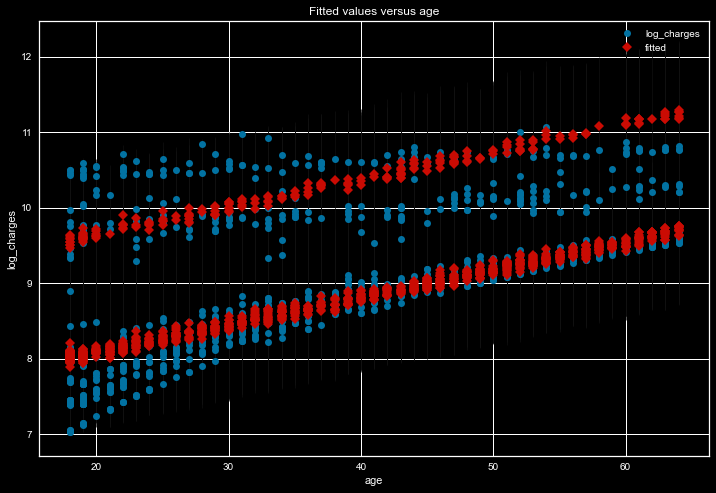

In [95]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(model_with_logcharges, "age", ax=ax)

In [105]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)

In [106]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


A few words about coding "region". In general, categorical variables with large variability are best encoded using OneHotEncoder and so on. But in this case, nothing will change, because there is no special order in which the regions would be listed. So used the Label Encoder.

In [155]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
x = df.drop(['charges'], axis = 1)
y = df.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7962732059725786


In [172]:
# Now let's add polynomial signs. And look at the result.
#Typically linear regression respond well to polynomial input variables.
X = df.drop(['charges'], axis = 1)
Y = df.charges



quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)
mseLinear=mean_squared_error(Y_test, Y_test_pred)
rmseLinear = mseLinear**(1/2)
print(plr.score(X_test,Y_test))
print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(Y_train,Y_train_pred),
mean_squared_error(Y_test,Y_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(Y_train,Y_train_pred),
r2_score(Y_test,Y_test_pred)))
score1=r2_score(Y_test,Y_test_pred)

0.8846283666147681
MSE train data: 24080212.111, MSE test data: 18163476.892
R2 train data: 0.831, R2 test data: 0.885


In [171]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(X_train,Y_train)
forest_train_pred = forest.predict(X_train)
forest_test_pred = forest.predict(X_test)
mseRF=mean_squared_error(Y_test, forest_test_pred)
rmseRF = mseRF**(1/2)
print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(Y_train,forest_train_pred),
mean_squared_error(Y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(Y_train,forest_train_pred),
r2_score(Y_test,forest_test_pred)))
score2=r2_score(Y_test,forest_test_pred)

MSE train data: 3738058.350, MSE test data: 20128435.222
R2 train data: 0.974, R2 test data: 0.872


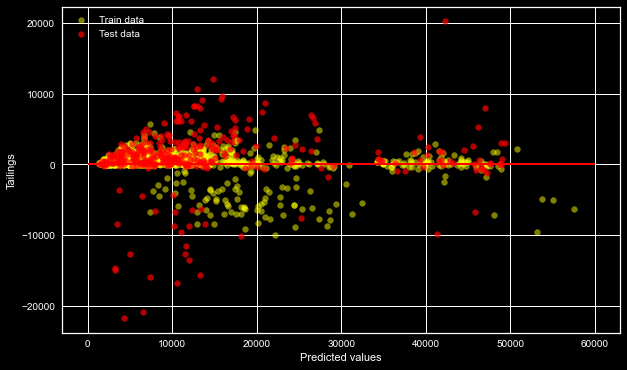

noticeable retraining of the algorithm on the training data.


In [166]:
plt.figure(figsize=(10,6))
plt.style.context('white_background')
plt.scatter(forest_train_pred,forest_train_pred - Y_train,
          c = 'yellow', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(forest_test_pred,forest_test_pred - Y_test,
          c = 'red', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')

plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()
print('noticeable retraining of the algorithm on the training data.')

In [173]:
from sklearn.linear_model import Ridge
ridgeModel = Ridge()
ridge = ridgeModel.fit(X_train, Y_train)
ridgePred_train = ridge.predict(X_train)
ridgePred_test = ridge.predict(X_test)
mseRidge = mean_squared_error(y_test, ridgePred)
rmseRidge = mseRidge**(1/2)
print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(Y_train,ridgePred_train),
mean_squared_error(Y_test,ridgePred_test)))

print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(Y_train,ridgePred_train),
r2_score(Y_test,ridgePred_test)))
score3=r2_score(Y_test,ridgePred_test)

MSE train data: 24095946.867, MSE test data: 18239690.299
R2 train data: 0.831, R2 test data: 0.884


In [174]:
from sklearn.linear_model import Lasso
lassoModel = Lasso()
lasso = lassoModel.fit(X_train, Y_train)
lassoPred_train = lasso.predict(X_train)
lassoPred_test = lasso.predict(X_test)
mseLasso=mean_squared_error(Y_test, lassoPred_test)
rmseLasso = mseLasso**(1/2)
print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(Y_train,lassoPred_train),
mean_squared_error(Y_test,lassoPred_test)))

print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(Y_train,lassoPred_train),
r2_score(Y_test,lassoPred_test)))
score4=r2_score(Y_test,lassoPred_test)

MSE train data: 24080731.672, MSE test data: 18154474.042
R2 train data: 0.831, R2 test data: 0.885


### summary of models

In [175]:
performanceData = pd.DataFrame({"model":["linear", "random_forest", "ridge", "lasso"], "R2 score":[score1, score2, score3, score4]})
print(performanceData)


           model  R2 score
0         linear  0.884628
1  random_forest  0.872147
2          ridge  0.884144
3          lasso  0.884686


Based on the table above, **LASSO** has a slight edge among the models considered having the MAX R2SCORE. This is not surprising as the other 3 models are known to be more robust when there are quite a number of features. We only have 8 this time.

### Conclusion

We have found out that region and gender does not bring significant difference on charges among its groups. Age, BMI, number of children and smoking are the once that drives the charges. The statistical relationship between number of children and charges is surprisingly different from our visualization. Meanwhile, linear regression has edged the regularized regression models in giving the best prediction. This proves that regularized regression models are not guaranteed to be superior to linear regressions.